In [1]:
from qslamdesignparams import GLOBALDICT
from riskanalysis import CreateQslamExpt as riskqslam
import numpy as np
import matplotlib.pyplot as plt
import copy

#### Playing round run - cplay

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 was not completed


particlesets.py:162: RuntimeWarning: overflow encountered in double_scalars
  normalisation = 1.0/unnormalised_total
particlesets.py:163: RuntimeWarning: invalid value encountered in multiply
  return normalisation*raw_weights


Variation  8 was not completed
Variation  9 was not completed
Variation  10 was not completed


qslamr.py:466: RuntimeWarning: invalid value encountered in multiply
  posterior_weights.append(alpha_particle.weight*beta_alpha_j_weights)


Variation  11 was not completed
Variation  12 was not completed
Variation  13 was not completed
Variation  14 successful.
Variation  15 successful.
Variation  16 successful.
Variation  17 successful.
Variation  18 successful.
Variation  19 successful.
Variation  20 successful.
Variation  21 successful.
Variation  22 successful.
Variation  23 successful.
Variation  24 successful.


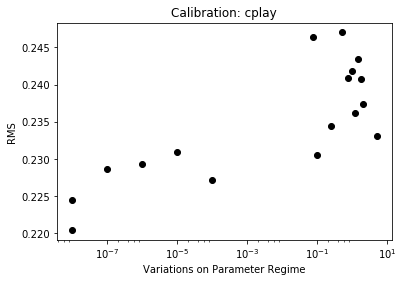

In [2]:
var_param_cplay = [0.00000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.003, 0.0063, 0.0082, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 5.0]
change_MAX_NUM_ITERATIONS = 50
change_SIGMOID_APPROX_ERROR = 0.001
change_QUANTISATION_UNCERTY = 0.01

savetopath = './calibrations_data/'
testcase_ID = 'cplay'
var_err_cplay = np.zeros(len(var_param_cplay))
plt.figure()

for idx_var in range(len(var_param_cplay)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["NOISEPARAMS"]["QUANTISATION_UNCERTY"]["SIGMA"] = change_QUANTISATION_UNCERTY #var_param_cplay[idx_var]
    vardict["MODELDESIGN"]["MAX_NUM_ITERATIONS"] = change_MAX_NUM_ITERATIONS
    vardict["NOISEPARAMS"]["SIGMOID_APPROX_ERROR"]["SIGMA"] = var_param_cplay[idx_var] #change_SIGMOID_APPROX_ERROR
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(**vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_cplay[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_cplay[idx_var], var_err_cplay[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Variations on Parameter Regime')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: C1

Variation  1 successful.
Variation  2 successful.
Variation  3 was not completed
Variation  4 was not completed
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.


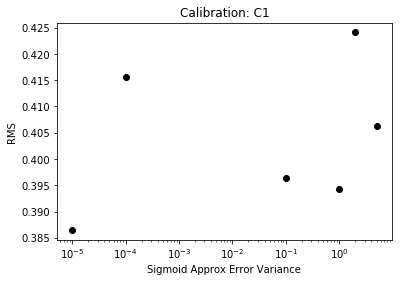

In [3]:
var_param_c1 = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0]

savetopath = './calibrations_data/'
testcase_ID = 'C1'
var_err_c1 = np.zeros(len(var_param_c1))
plt.figure()

for idx_var in range(len(var_param_c1)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["NOISEPARAMS"]["SIGMOID_APPROX_ERROR"]["SIGMA"] = var_param_c1[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(**vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_c1[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_c1[idx_var], var_err_c1[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Sigmoid Approx Error Variance')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: C2

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.


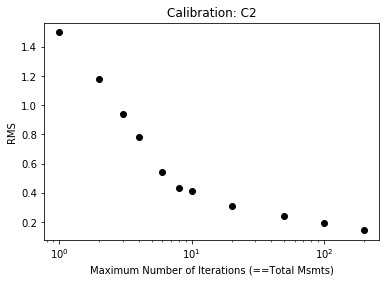

In [4]:
var_param_c2 = [1, 2, 3, 4, 6, 8, 10, 20, 50, 100, 200]
savetopath = './calibrations_data/'
testcase_ID = 'C2'
var_err_c2 = np.zeros(len(var_param_c2))
plt.figure()

for idx_var in range(len(var_param_c2)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["MAX_NUM_ITERATIONS"] = var_param_c2[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(**vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_c2[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_c2[idx_var], var_err_c2[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Maximum Number of Iterations (==Total Msmts)')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

In [9]:
var_err_c2

array([ 1.49727699,  1.17618959,  0.94068637,  0.78444122,  0.53963922,
        0.43385253,  0.40993987,  0.30576905,  0.24025234,  0.19326446,
        0.14403593])

#### Calibration Run: C3

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.


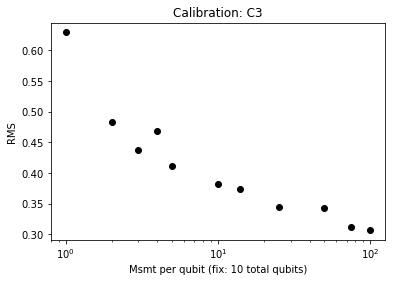

In [5]:
var_param_c3 = [1, 2, 3, 4, 5, 10, 14, 25, 50, 75, 100]
savetopath = './calibrations_data/'
testcase_ID = 'C3'
var_err_c3 = np.zeros(len(var_param_c3))
plt.figure()

for idx_var in range(len(var_param_c3)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["MSMTS_PER_NODE"] = var_param_c3[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(**vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_c3[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_c3[idx_var], var_err_c3[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Msmt per qubit (fix: 10 total qubits)')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: C4

Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Variation  1 successful.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Contro

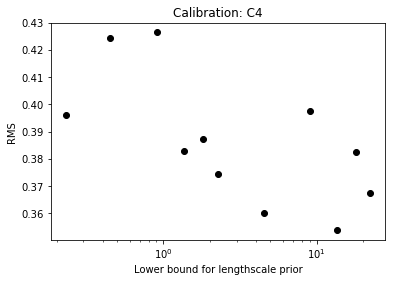

In [6]:
var_param_c4 = [0.23, 0.45, 0.91, 1.36, 1.81, 2.26, 4.53, 9.05, 13.58, 18.10, 22.40]
savetopath = './calibrations_data/'
testcase_ID = 'C4'
var_err_c4 = np.zeros(len(var_param_c4))
plt.figure()

for idx_var in range(len(var_param_c4)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["MULTIPLER_R_MIN"] = var_param_c4[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(**vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_c4[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_c4[idx_var], var_err_c4[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Lower bound for lengthscale prior')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: C5

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.
Variation  12 successful.
Variation  13 successful.
Variation  14 successful.


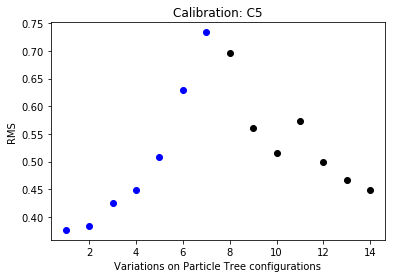

In [7]:
c5_alpha = [5, 5, 5, 5, 5, 5, 5, 1, 2, 3, 4, 5, 10, 20]
c5_beta =  [2, 4, 6, 7, 10, 20, 40, 10, 10, 10, 10, 10, 10, 10]


var_param_c5 = zip(c5_alpha, c5_beta)
savetopath = './calibrations_data/'
testcase_ID = 'C5'
var_err_c5 = np.zeros(len(var_param_c5))
plt.figure()

for idx_var in range(len(var_param_c5)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["P_ALPHA"] = var_param_c5[idx_var][0]
    vardict["MODELDESIGN"]["P_BETA"] = var_param_c5[idx_var][1]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(**vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_c5[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        if idx_var + 1 > 7 :
            plt.plot(idx_var + 1, var_err_c5[idx_var], 'ko')
        if idx_var + 1 <= 7 :
            plt.plot(idx_var + 1, var_err_c5[idx_var], 'bo')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Variations on Particle Tree configurations')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: C6

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.


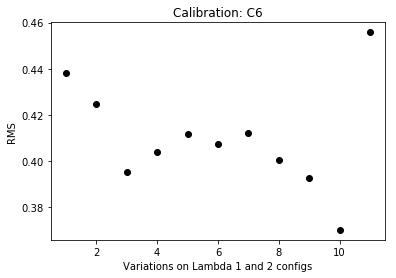

In [8]:
c6_lambda1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.99, 0.82, 0.965, 0.0]
c6_lambda2 = [1.0, 0.998, 0.9955, 0.993, 0.99, 0.9864, 0.982, 0.977, 0.968, 0.956, 0.0]


var_param_c6 = zip(c6_lambda1, c6_lambda2)
savetopath = './calibrations_data/'
testcase_ID = 'C6'
var_err_c6 = np.zeros(len(var_param_c6))
plt.figure()

for idx_var in range(len(var_param_c6)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["LAMBDA_1"] = var_param_c6[idx_var][0]
    vardict["MODELDESIGN"]["LAMBDA_2"] = var_param_c6[idx_var][1]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(**vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_c6[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(idx_var + 1, var_err_c6[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Variations on Lambda 1 and 2 configs')
# plt.ylim([0, 1])
plt.show()  